# 🐶 Using Transfer Learning and Tensorflow 2.0 to Classify Different Dog Breeds.

In this project we're going to be using machine learning to help us identify different breeds of dogs.

The data is from  [Kaggle dog breed identification competition](https://github.com/mrdbourke/zero-to-mastery-ml/blob/master/section-4-unstructured-data-projects/end-to-end-dog-vision.ipynb). It consists of a collection of 10,000+ labelled images of 120 different dog breeds.

So we're going to go through the following TensorFlow/Deep learning workflow:
  1. Get data ready (download from Kaggle)
  2. Prepare the data
  3. Choose and fit/train a model.
  4. Evaluating a model.
  5. Improve the model through experimentation.
  6. Save, Sharing and reloading the model.

For preprocessing our data, we're going to be use TensorFlow and TensorFlow Hub to get a pretrained deep learning model.
 

In [53]:
# imports for modeling
import tensorflow as tf
import tensorflow_hub as hub
import numpy as np

# imports for data handling
import pandas as pd
import os
from IPython.display import Image


In [54]:
#!unzip "/content/drive/MyDrive/Colab Notebooks/TensorFlow/Dog-vision app/dog-breed-identification.zip" -d "/content/drive/MyDrive/Colab Notebooks/TensorFlow/Dog-vision app/"

## Getting our data ready 
Turning our images into Tensors.

In [55]:
# Cehckout the labels of our data.
labels_csv = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/TensorFlow/Dog-vision app/labels.csv")
labels_csv.head()

,id,breed
0,000bec180eb18c7604dcecc8fe0dba07,boston_bull
1,001513dfcb2ffafc82cccf4d8bbaba97,dingo
2,001cdf01b096e06d78e9e5112d419397,pekinese
3,00214f311d5d2247d5dfe4fe24b2303d,bluetick
4,0021f9ceb3235effd7fcde7f7538ed62,golden_retriever


<AxesSubplot:>

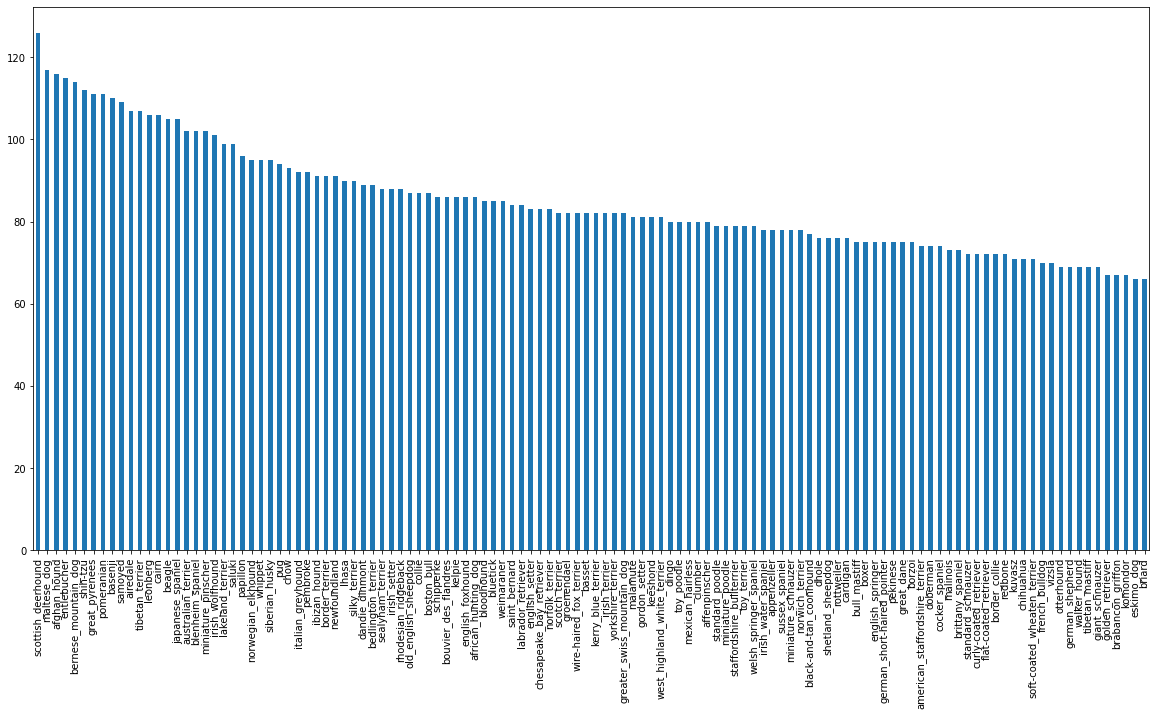

In [56]:
# How many images are there of each breed?
labels_csv["breed"].value_counts().plot.bar(figsize=(20,10))

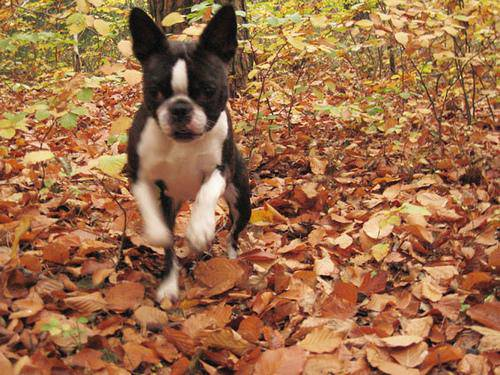

In [57]:
Image("/content/drive/MyDrive/Colab Notebooks/TensorFlow/Dog-vision app/train/000bec180eb18c7604dcecc8fe0dba07.jpg")

In [58]:
# Create pathnames from image ID's
filenames= ["/content/drive/MyDrive/Colab Notebooks/TensorFlow/Dog-vision app/train/" + fname + ".jpg" for fname in labels_csv["id"]]

# Check the firts 10
filenames[:10]

['/content/drive/MyDrive/Colab Notebooks/TensorFlow/Dog-vision app/train/000bec180eb18c7604dcecc8fe0dba07.jpg',
 '/content/drive/MyDrive/Colab Notebooks/TensorFlow/Dog-vision app/train/001513dfcb2ffafc82cccf4d8bbaba97.jpg',
 '/content/drive/MyDrive/Colab Notebooks/TensorFlow/Dog-vision app/train/001cdf01b096e06d78e9e5112d419397.jpg',
 '/content/drive/MyDrive/Colab Notebooks/TensorFlow/Dog-vision app/train/00214f311d5d2247d5dfe4fe24b2303d.jpg',
 '/content/drive/MyDrive/Colab Notebooks/TensorFlow/Dog-vision app/train/0021f9ceb3235effd7fcde7f7538ed62.jpg',
 '/content/drive/MyDrive/Colab Notebooks/TensorFlow/Dog-vision app/train/002211c81b498ef88e1b40b9abf84e1d.jpg',
 '/content/drive/MyDrive/Colab Notebooks/TensorFlow/Dog-vision app/train/00290d3e1fdd27226ba27a8ce248ce85.jpg',
 '/content/drive/MyDrive/Colab Notebooks/TensorFlow/Dog-vision app/train/002a283a315af96eaea0e28e7163b21b.jpg',
 '/content/drive/MyDrive/Colab Notebooks/TensorFlow/Dog-vision app/train/003df8b8a8b05244b1d920bb6cf451f

In [59]:
# Check if our number of filenames matches with the number of image files.
import os
if len(os.listdir("/content/drive/MyDrive/Colab Notebooks/TensorFlow/Dog-vision app/train/")) == len(filenames):
  print("Filenames match actual amount of files!")
else:
  print("Filenames do not match actual amount of files, check the target directory.")

Filenames match actual amount of files!


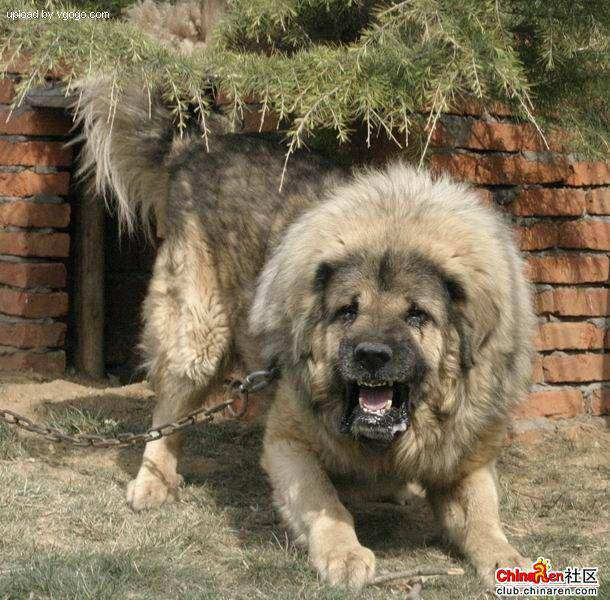

In [60]:
# One more check
Image(filenames[9000])

Since we've now got our training image filepaths in a list, let's prepare our labels. 

In [61]:
labels = labels_csv["breed"].to_numpy()
labels

array(['boston_bull', 'dingo', 'pekinese', ..., 'airedale',
       'miniature_pinscher', 'chesapeake_bay_retriever'], dtype=object)

In [62]:
# Find the unique label values
unique_breeds = np.unique(labels)
len(unique_breeds)

120

In [63]:
# Turn every label into a boolean array
boolean_labels = [label == np.array(unique_breeds) for label in labels]
boolean_labels[:2]
                  

[array([False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False,  True, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False]),
 array([False, False, False, False, False, Fal

### Creating our own validation set


In [64]:
# Setup X & y variables
X = filenames
y = boolean_labels

Since we're working with 10,000+ images, it's a good idea to work with a portion of them to make sure things are working before training on them all.

Let's start experimenting with 1000 and increase it as we need.

In [65]:
# Set number of images of use for experimeting
NUM_IMAGES = 1000 #@param {type:"slider", min:0, max:10000, step:1000}

Now let's split our data into training and validation sets.

In [66]:
# Split data into train anda validation sets
from sklearn.model_selection import train_test_split

# Split them into training and validation of total size NUM_IMAGES
X_train, X_val, y_train, y_val = train_test_split(X[:NUM_IMAGES],
                                                  y[:NUM_IMAGES],
                                                  test_size=0.2,
                                                  random_state=42)

len(X_train), len(y_train), len(X_val), len(y_val)

(800, 800, 200, 200)

### Preprocess the Data (Turn in into tensors).
To preprocess our images into Tensors we're going to write a function which does a few things:

1. Takes an image filename as input.
2. Uses TensorFlow to read the file and save it to a variable, image.
3. Turn our image into Tensors.
4. Resize the image to be of shape (224, 224).
5. Return the modified image.

In [67]:
# Define image size
IMG_SIZE = 224

# CREATE A FUNCTION FOR PREPROCESSING IMAGES
def process_image(image_path, img_size = IMG_SIZE):
  """
  Takes an image file path and turns the image into a tensor.
  """
  # Read in an image file
  image = tf.io.read_file(image_path)
  # Turn the jpeg image into numerical Tensor with 3 colour channels
  image = tf.image.decode_jpeg(image, channels=3)
  # Convert the colour channel values from 0-255 to 0-1 values
  image = tf.image.convert_image_dtype(image,tf.float32)
  # Resize the image to our desired value (224,224)
  image = tf.image.resize(image, size=[IMG_SIZE, IMG_SIZE])

  return image
  


### Turning our data into batches.
TensorFlow is very efficient when your data is in batches of (image, label) Tensors. So we'll build a function to do create those first. We'll take advantage of of `process_image` function at the same time.

In [68]:
# Create a simple function to return a tuple (image, label)
def get_image_label(image_path, label):
  """
  Takes an image file path name and the associated label,
  processes the image and returns a tuple of (image,label)
  """
  image = process_image(image_path)
  return image, label


Now we got to make 

In [69]:
# Define the batch size
BATCH_SIZE = 32
IMG_SIZE= 224

# Create a function to run data into batches.
def create_data_batches(x, y=None, batch_size = BATCH_SIZE, valid_data = False, test_data= False):
  """
  Creates batches of data out of image (x) and label (y) pairs.
  Shuffles the data if it's training data but does't shuffle if it's validation data.
  Also accepts test data as input  
  """
 # If the data is a test dataset, we probably don't have labels
  if test_data:
   print("Creating test data batches...")
   data= tf.data.Dataset.from_tensor_slices((tf.constant(x))) # only filepaths
   data_batch = data.map(process_image).batch(BATCH_SIZE)
   return data_batch

 # If the data if a valida dataset, we don't need to shuffle it
  elif valid_data:
   print("Creating validation data batches...")
   data = tf.data.Dataset.from_tensor_slices((tf.constant(x),
                                              tf.constant(y))) 
   data_batch = data.map(get_image_label).batch(BATCH_SIZE)
   return data_batch

  else:
    # If the data is a training dataset, we shuffle it
    print("Creating training data batches...")
    # Turn filepaths and labels into tensors
    data = tf.data.Dataset.from_tensor_slices((tf.constant(x),
                                              tf.constant(y)))
    
    # Shufflig pathnames and labels before mapping image processor function is faster than shuffling images.
    data = data.shuffle(buffer_size=len(x))

    # Create (image, label) tuples
    data = data.map(get_image_label)

    # Turn the data into batches
    data_batch= data.batch(BATCH_SIZE)
    return data_batch
 

In [70]:
# Create training and validation data batches
train_data = create_data_batches(X_train, y_train)
val_data = create_data_batches(X_val, y_val, valid_data= True)

Creating training data batches...
Creating validation data batches...


In [71]:
train_data.element_spec, val_data.element_spec

((TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None),
  TensorSpec(shape=(None, 120), dtype=tf.bool, name=None)),
 (TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None),
  TensorSpec(shape=(None, 120), dtype=tf.bool, name=None)))

In [72]:
train_data.element_spec, val_data.element_spec

((TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None),
  TensorSpec(shape=(None, 120), dtype=tf.bool, name=None)),
 (TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None),
  TensorSpec(shape=(None, 120), dtype=tf.bool, name=None)))

Our tensors are ready for use on a GPU, but firts lets build a fuction whicks help us to visualize what's going on under the hood.

### Visualizing data batches

In [73]:
import matplotlib.pyplot as plt

# Create a function for viewing images in a data batch
def show_25_images(images, labels):
  """
  Displays 25 images from a data batch.
  """
  # Setup the figure
  plt.figure(figsize=(10, 10))
  # Loop through 25 (for displaying 25 images)
  for i in range(25):
    # Create subplots (5 rows, 5 columns)
    ax = plt.subplot(5, 5, i+1)
    # Display an image
    plt.imshow(images[i])
    # Add the image label as the title
    plt.title(unique_breeds[labels[i].argmax()])
    # Turn gird lines off
    plt.axis("off")

For make a plot of our databatches we need to unwinds it firts, for that reason we'll use the method called `as_numpy_iterator()`, this method tourn our data batch into something which can be iterated over.

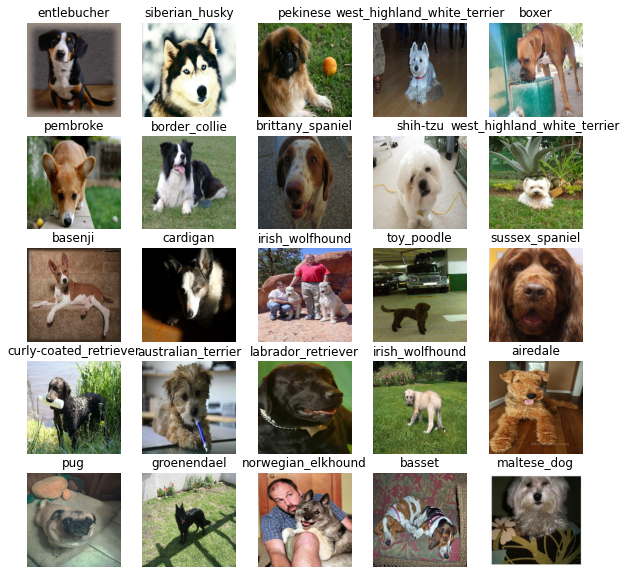

In [74]:
# Visualize training images from the training data batch
train_images , train_labels = next(train_data.as_numpy_iterator())
show_25_images(train_images, train_labels)

## Creating and training a model.

### Set up the architecture
For our CNN we're going to use the MobileNetV2 architecture , published in 2018, because it is a efficient structure for on-device image classification and related tasks.

In [75]:
# Setup input shape to the model
INPUT_SHAPE = [None, IMG_SIZE, IMG_SIZE, 3] # batch, height, width, colour channels

# Setup output shape of the model
OUTPUT_SHAPE = len(unique_breeds) # number of unique labels

# Setup model URL from TensorFlow Hub
MODEL_URL = "https://tfhub.dev/google/imagenet/mobilenet_v2_130_224/classification/4"

In [76]:
# Create function which builds a keras model
def create_model(input_shape = INPUT_SHAPE, out_shape= OUTPUT_SHAPE, model_url= MODEL_URL):
  print("Building model with: ", MODEL_URL)

  # Setup the model layers
  model = tf.keras.Sequential([
      hub.KerasLayer(MODEL_URL),
      tf.keras.layers.Dense(units= OUTPUT_SHAPE,
                            activation="softmax")
  ])

  # Compile the model
  model.compile(
      loss= tf.keras.losses.CategoricalCrossentropy(),
      optimizer= tf.keras.optimizers.Adam(),
      metrics=["accuracy"]
  )

  # Build the model
  model.build(INPUT_SHAPE)

  return model

In [77]:
model = create_model()
model.summary()

Building model with:  https://tfhub.dev/google/imagenet/mobilenet_v2_130_224/classification/4
Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer_5 (KerasLayer)  (None, 1001)              5432713   
                                                                 
 dense_5 (Dense)             (None, 120)               120240    
                                                                 
Total params: 5,552,953
Trainable params: 120,240
Non-trainable params: 5,432,713
_________________________________________________________________


The non-triable parameters are the patterns learned by **mobilenet_v2_130_224** and the trainable parameters are the ones in the dense layer we added.

### Creating callbacks

We'll create two callbacks: 

  * **Tensorboard Callback:** Helps us to track our models progress.
  * **Early stopping  callback:** Prevents our model from training for too long, avoiding the overtfitting.

TensorBoard Callback:

In [78]:
#Load the tensorboard notebook extension
%load_ext tensorboard

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


In [131]:
import datetime
# Create a function to build a TensorBoard callback
def create_tensorboard_callback():
  # create a log directory for storing Tensorboard logs
  logdir = os.path.join("/content/drive/MyDrive/Colab Notebooks/TensorFlow/Dog-vision app/logs",
                        datetime.datetime.now().strftime("%Y%m%d-%H%M%S"))
  return tf.keras.callbacks.TensorBoard(logdir)


Early Stopping Callback:

In [80]:
# Create early stopping callback
early_stopping = tf.keras.callbacks.EarlyStopping(monitor="val_accuracy",
                                                  patience=3)

## Fit the model

### Training the first model on a subset of data
Our first model is only going to train on 1000 images, to make sure everything is working as expected.

In [81]:
NUM_EPOCHS = 100 #@param {type:"slider", min:10, max:100, step:10}

In [82]:
# Lets build a function to train and return a trained model.
def train_model():
  """
  Trains a given model and returns the trained version.
  """
  # Create a model
  model = create_model()

  # Create new TensorBoard session everytime we train a model
  tensorboard = create_tensorboard_callback()

  # Fit the model to the data passing it the callbacks we created
  model.fit(x=train_data,
            epochs= NUM_EPOCHS,
            validation_data= val_data,
            validation_freq=1,
            callbacks=[tensorboard, early_stopping])
  # Return the fitted model
  return model


In [83]:
# Fit the model to the data
model = train_model()

Building model with:  https://tfhub.dev/google/imagenet/mobilenet_v2_130_224/classification/4
Epoch 1/100
25/25 [==============================] - 38s 942ms/step - loss: 4.4971 - accuracy: 0.1050 - val_loss: 3.4564 - val_accuracy: 0.2500
Epoch 2/100
25/25 [==============================] - 6s 260ms/step - loss: 1.5898 - accuracy: 0.7038 - val_loss: 2.2166 - val_accuracy: 0.4900
Epoch 3/100
25/25 [==============================] - 4s 144ms/step - loss: 0.5551 - accuracy: 0.9438 - val_loss: 1.6786 - val_accuracy: 0.5750
Epoch 4/100
25/25 [==============================] - 4s 150ms/step - loss: 0.2533 - accuracy: 0.9825 - val_loss: 1.5201 - val_accuracy: 0.5900
Epoch 5/100
25/25 [==============================] - 3s 122ms/step - loss: 0.1446 - accuracy: 0.9950 - val_loss: 1.4408 - val_accuracy: 0.6100
Epoch 6/100
25/25 [==============================] - 4s 167ms/step - loss: 0.1011 - accuracy: 1.0000 - val_loss: 1.3927 - val_accuracy: 0.6450
Epoch 7/100
25/25 [============================

Naturally, the model is overfitting, because we are only using 10% of our data set, however, the good news is that the model has learned! 🙂 so maybe if we use more data it will get even better...

## Evaluating the model

### Checking out the tensorbord

In [ ]:
%tensorboard --logdir content/drive/MyDrive/Colab Notebooks/TensorFlow/logs

### Making predictions using the trained model

In [85]:
# Make predictions on the validation data (not used to train on)
predictions = model.predict(val_data, verbose=1) 
predictions.shape

7/7 [==============================] - 4s 91ms/step


(200, 120)

In this case, making predictions on the validation data (200 images) returns an array (predictions) of arrays, each containing 120 different values (one for each unique dog breed).

These different values are the probabilities or the likelihood the model has predicted a certain image being a certain breed of dog. The higher the value, the more likely the model thinks a given image is a specific breed of dog.

In [86]:
# Turn prediction probabilities into their respective label (easier to understand)
def get_pred_label(prediction_probabilities):
  """
  Turns an array of prediction probabilities into a label.
  """
  return unique_breeds[np.argmax(prediction_probabilities)]

# Get a predicted label based on an array of prediction probabilities
pred_label = get_pred_label(predictions[0])
pred_label

'border_terrier'

Now we had to compare the predictions of our model with his REAL label, for doing these we need to create a function to iterate the `val_data ` and get this values.

In [87]:
# Create a function to unbatch a batched dataset
def unbatchify(data):
  """
  Takes a batched dataset of (image, label) Tensors and returns separate arrays
  of images and labels.
  """
  images = []
  labels = []
  # Loop through unbatched data
  for image, label in data.unbatch().as_numpy_iterator():
    images.append(image)
    labels.append(unique_breeds[np.argmax(label)])
  return images, labels

# Unbatchify the validation data
val_images, val_labels = unbatchify(val_data)
val_images[0], val_labels[0]

(array([[[0.29599646, 0.43284872, 0.3056691 ],
         [0.26635826, 0.32996926, 0.22846507],
         [0.31428418, 0.27701408, 0.22934894],
         ...,
         [0.77614343, 0.82320225, 0.8101595 ],
         [0.81291157, 0.8285351 , 0.8406944 ],
         [0.8209297 , 0.8263737 , 0.8423668 ]],
 
        [[0.2344871 , 0.31603682, 0.19543913],
         [0.3414841 , 0.36560842, 0.27241898],
         [0.45016077, 0.40117094, 0.33964607],
         ...,
         [0.7663987 , 0.8134138 , 0.81350833],
         [0.7304248 , 0.75012016, 0.76590735],
         [0.74518913, 0.76002574, 0.7830809 ]],
 
        [[0.30157745, 0.3082587 , 0.21018331],
         [0.2905954 , 0.27066195, 0.18401104],
         [0.4138316 , 0.36170745, 0.2964005 ],
         ...,
         [0.79871625, 0.8418535 , 0.8606443 ],
         [0.7957738 , 0.82859945, 0.8605655 ],
         [0.75181633, 0.77904975, 0.8155256 ]],
 
        ...,
 
        [[0.9746779 , 0.9878955 , 0.9342279 ],
         [0.99153054, 0.99772066, 0.94278

WonderFul! Let's make a function to make these all a bit more visualize.

### Visualizing some predictions

In [89]:
def plot_pred(predictions_probabilities, labels, images, n=1):
  """
  View the prediction, ground truth label and image for sample n.
  """
  pred_prob, true_label, image = predictions_probabilities[n], labels[n], images[n]

  # Get the pre label
  pred_label = get_pred_label(pred_prob)

  # Plot image & remove ticks.
  plt.imshow(image)
  plt.xticks([])
  plt.yticks([])

  # Change the color of the imtitle depending on if the prediction is right or wrong
  if pred_label == true_label:
    color ="green"
  else:
    color ="red"
  
  plt.title("{} {:2.0f}% ({})".format(pred_label,
                                      np.max(pred_prob)*100,
                                      true_label),
                                      color=color)


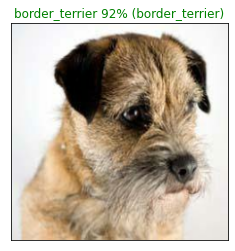

In [93]:
# View an example prediction, original image and truth label
plot_pred(predictions_probabilities=predictions,
          labels=val_labels,
          images=val_images,
          n=56)

Seens that our model have some good catches, let's visualize how confidence are!

In [107]:
def plot_pred_conf(prediction_probabilities, labels, n=1):
  
  """
  Plot the top 10 highest predictions confidences along with the truth label for sample n.
  """
  pred_prob, true_label = prediction_probabilities[n], labels[n]

  # Get the predicted label
  pred_label = get_pred_label(pred_prob)

  # Find the top 10 prediction confidence indexes
  top_10_pred_indexes = pred_prob.argsort()[-10:][::-1]
  # Find the top 10 prediction confidence values
  top_10_pred_values = pred_prob[top_10_pred_indexes]
  # Find the top 10 prediction labels
  top_10_pred_labels = unique_breeds[top_10_pred_indexes]

  # Setup plot
  top_plot = plt.bar(np.arange(len(top_10_pred_labels)), 
                     top_10_pred_values, 
                     color="grey")
  plt.xticks(np.arange(len(top_10_pred_labels)),
             labels=top_10_pred_labels,
             rotation="vertical")

  # Change color of true label
  if np.isin(true_label, top_10_pred_labels):
    top_plot[np.argmax(top_10_pred_labels == true_label)].set_color("green")
  else:
    pass


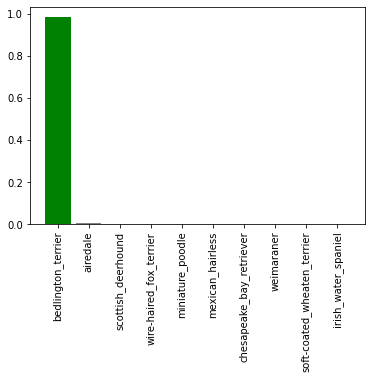

In [113]:
plot_pred_conf(prediction_probabilities = predictions,
               labels= val_labels,
               n=5)

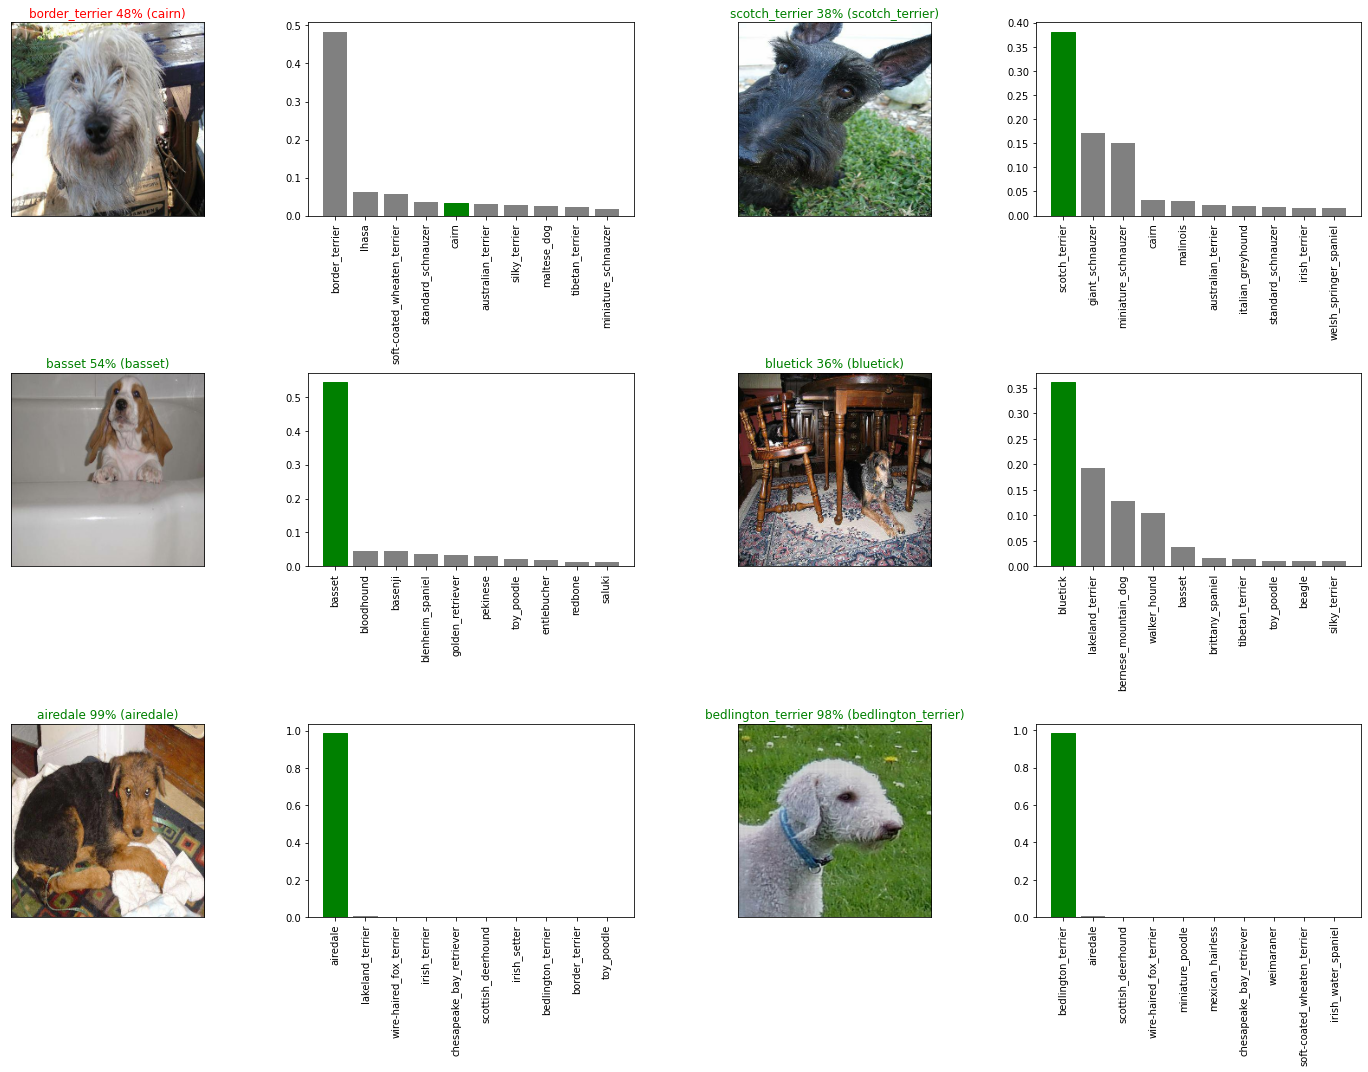

In [117]:
# Lets check out a few predictions and their different values
i_multiplier= 0
num_rows = 3
num_cols = 2
num_images = num_rows*num_cols
plt.figure(figsize= (10*num_cols,5*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_pred(predictions_probabilities=predictions,
            labels=val_labels,
            images=val_images,
            n=i+i_multiplier)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_pred_conf(prediction_probabilities=predictions,
                labels=val_labels,
                n=i+i_multiplier)
plt.tight_layout(h_pad=1.0)
plt.show()

## Saving and reloading a model

In [120]:
# Create a function to save a model
def save_model(model, suffix=None):
  """
  Saves a given model in a models directory and appends a suffix (string).
  """
  # Create a model directory pathname with current time
  modeldir = os.path.join("/content/drive/MyDrive/Colab Notebooks/TensorFlow/Dog-vision app/models",
                          datetime.datetime.now().strftime("%Y%m%d-%H%M%s"))
  model_path = modeldir + "-" + suffix + ".h5" # save format of model
  print(f"Saving model to: {model_path}...")
  model.save(model_path)
  return model_path

In [121]:
# Create a function to load a model
def load_model(model_path):
  """
  Loads a saved model from a specified path.
  """
  print(f"Loading saved model from: {model_path}")
  model = tf.keras.models.load_model(model_path,
                                     custom_objects={"KerasLayer":hub.KerasLayer})
  return model

In [122]:
# Save our model trained on 1000 images
save_model(model, suffix="1000-images-Adam")

Saving model to: /content/drive/MyDrive/Colab Notebooks/TensorFlow/Dog-vision app/models/20230301-03181677640683-1000-images-Adam.h5...


'/content/drive/MyDrive/Colab Notebooks/TensorFlow/Dog-vision app/models/20230301-03181677640683-1000-images-Adam.h5'

In [123]:
# Load our model trained on 1000 images
model_1000_images = load_model('/content/drive/MyDrive/Colab Notebooks/TensorFlow/Dog-vision app/models/20230301-03181677640683-1000-images-Adam.h5')

Loading saved model from: /content/drive/MyDrive/Colab Notebooks/TensorFlow/Dog-vision app/models/20230301-03181677640683-1000-images-Adam.h5


In [124]:
# Evaluate the pre-saved model
model.evaluate(val_data)

7/7 [==============================] - 1s 204ms/step - loss: 1.3009 - accuracy: 0.6500


[1.300949215888977, 0.6499999761581421]

In [125]:
# Evaluate the loaded model
model_1000_images.evaluate(val_data)

7/7 [==============================] - 3s 207ms/step - loss: 1.3009 - accuracy: 0.6500


[1.300949215888977, 0.6499999761581421]

## Improve throught experimentation.

### Training the model with all the data. 🦮

In [127]:
# Create a data batch with the full data set
full_data = create_data_batches(X,y)

Creating training data batches...


In [128]:
full_data

<BatchDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 120), dtype=tf.bool, name=None))>

In [129]:
# Create a model
full_model = create_model()

Building model with:  https://tfhub.dev/google/imagenet/mobilenet_v2_130_224/classification/4


In [130]:
full_model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer_7 (KerasLayer)  (None, 1001)              5432713   
                                                                 
 dense_7 (Dense)             (None, 120)               120240    
                                                                 
Total params: 5,552,953
Trainable params: 120,240
Non-trainable params: 5,432,713
_________________________________________________________________


In [132]:
# Create afull model callbacks
full_model_tensorboard = create_tensorboard_callback()

full_model_early_stopping = tf.keras.callbacks.EarlyStopping(monitor="accuracy",
                                                             patience=3)

In [133]:
# Fit the full model to the full data
full_model.fit(x=full_data,
               epochs= NUM_EPOCHS,
               callbacks=[full_model_tensorboard, full_model_early_stopping])

Epoch 1/100
320/320 [==============================] - 42s 113ms/step - loss: 1.3676 - accuracy: 0.6636
Epoch 2/100
320/320 [==============================] - 36s 111ms/step - loss: 0.4040 - accuracy: 0.8814
Epoch 3/100
320/320 [==============================] - 35s 109ms/step - loss: 0.2354 - accuracy: 0.9349
Epoch 4/100
320/320 [==============================] - 36s 112ms/step - loss: 0.1567 - accuracy: 0.9629
Epoch 5/100
320/320 [==============================] - 35s 109ms/step - loss: 0.1080 - accuracy: 0.9780
Epoch 6/100
320/320 [==============================] - 36s 112ms/step - loss: 0.0782 - accuracy: 0.9867
Epoch 7/100
320/320 [==============================] - 35s 109ms/step - loss: 0.0586 - accuracy: 0.9905
Epoch 8/100
320/320 [==============================] - 37s 114ms/step - loss: 0.0468 - accuracy: 0.9941
Epoch 9/100
320/320 [==============================] - 36s 113ms/step - loss: 0.0378 - accuracy: 0.9966
Epoch 10/100
320/320 [==============================] - 42s 130m

In [152]:
# Save model to file
save_model(full_model, suffix="all-images-Adam")

Saving model to: /content/drive/MyDrive/Colab Notebooks/TensorFlow/Dog-vision app/models/20230301-04251677644742-all-images-Adam.h5...


'/content/drive/MyDrive/Colab Notebooks/TensorFlow/Dog-vision app/models/20230301-04251677644742-all-images-Adam.h5'

In [154]:
# Load in the full model
loaded_full_model = load_model("/content/drive/MyDrive/Colab Notebooks/TensorFlow/Dog-vision app/models/20230301-04251677644742-all-images-Adam.h5")

Loading saved model from: /content/drive/MyDrive/Colab Notebooks/TensorFlow/Dog-vision app/models/20230301-04251677644742-all-images-Adam.h5


### Making predictions on the test data set

Since our model has been trined on images in the form of tensor batches, to make predictions on the test data, we'll have to get it into the same format.

So for make predictions on the test data, we'll:
* Get the test image filenames
* Convert the filenames in to test data batches.
* Make a predictions array by passing the test batches to the predict method.

In [138]:
# Load test image filenames
test_path = "drive/MyDrive/Colab Notebooks/TensorFlow/Dog-vision app/test/"
test_filenames = [test_path + fname for fname in os.listdir(test_path)]
test_filenames[:10]

['drive/MyDrive/Colab Notebooks/TensorFlow/Dog-vision app/test/c72dd7ad6b629d37103ba159aebf9dee.jpg',
 'drive/MyDrive/Colab Notebooks/TensorFlow/Dog-vision app/test/c737d057ec6e4c28e01f2f54e956a3ae.jpg',
 'drive/MyDrive/Colab Notebooks/TensorFlow/Dog-vision app/test/c7433d065a50c67c4f978c79964710be.jpg',
 'drive/MyDrive/Colab Notebooks/TensorFlow/Dog-vision app/test/c7544aa210a3148fb29dfb17e45ea3b0.jpg',
 'drive/MyDrive/Colab Notebooks/TensorFlow/Dog-vision app/test/c749fd1c99ee7b2115b6d7d1ac840e76.jpg',
 'drive/MyDrive/Colab Notebooks/TensorFlow/Dog-vision app/test/c75a426fb7b62cfa546947a05a86ca45.jpg',
 'drive/MyDrive/Colab Notebooks/TensorFlow/Dog-vision app/test/c758e3c1a01e3116b0f260945546ff50.jpg',
 'drive/MyDrive/Colab Notebooks/TensorFlow/Dog-vision app/test/c75da09225946d326237eea4f3fd8f43.jpg',
 'drive/MyDrive/Colab Notebooks/TensorFlow/Dog-vision app/test/c762956da4860b0ee3a5f9c7b7fdb57f.jpg',
 'drive/MyDrive/Colab Notebooks/TensorFlow/Dog-vision app/test/c769a926643b01af05e

In [139]:
len(test_filenames)

11033

In [140]:
test_data = create_data_batches(test_filenames, test_data= True)

Creating test data batches...


In [141]:
test_data

<BatchDataset element_spec=TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None)>

In [143]:
# Make predictions on test data batch using the loaded full model
test_predictions = full_model.predict(test_data,
                                     verbose=1)

345/345 [==============================] - 1180s 3s/step


In [145]:
# Save predictions (Numpy array) to csv file
np.savetxt("/content/drive/MyDrive/Colab Notebooks/TensorFlow/Dog-vision app/preds_array.csv", test_predictions, delimiter=",")

In [155]:
# Load predictions (Numpy array) from csv file
test_predictions = np.loadtxt("drive/MyDrive/Colab Notebooks/TensorFlow/Dog-vision app/preds_array.csv", delimiter=",")

# Making predictions on custom images

To make predictions on custom images, we'll:

* Get the filepaths of our own images.
* Turn the filepaths into data batches using create_data_batches(). And since our custom images won't have labels, we set the test_data parameter to True.
* Pass the custom image data batch to our model's predict() method.
* Convert the prediction output probabilities to prediction labels.
* Compare the predicted labels to the custom images.

In [162]:
# Get custom image filepaths
custom_path = "/content/drive/MyDrive/Colab Notebooks/TensorFlow/Dog-vision app/my-dog-photos/"
custom_image_paths = [custom_path + fname for fname in os.listdir(custom_path)]

In [163]:
# Turn custom image into batch (set to test data because there are no labels)
custom_data = create_data_batches(custom_image_paths, test_data=True)

Creating test data batches...


In [164]:
# Make predictions on the custom data
custom_preds = full_model.predict(custom_data)

1/1 [==============================] - 1s 969ms/step


In [165]:
# Get custom image prediction labels
custom_pred_labels = [get_pred_label(custom_preds[i]) for i in range(len(custom_preds))]
custom_pred_labels

['lhasa', 'west_highland_white_terrier']

In [166]:
# Get custom images (our unbatchify() function won't work since there aren't labels)
custom_images = []
# Loop through unbatched data
for image in custom_data.unbatch().as_numpy_iterator():
  custom_images.append(image)

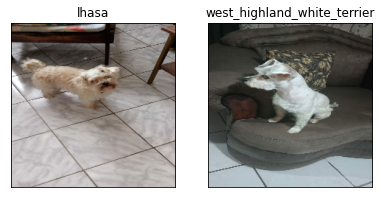

In [167]:
# Check custom image predictions
plt.figure(figsize=(10, 10))
for i, image in enumerate(custom_images):
  plt.subplot(1, 3, i+1)
  plt.xticks([])
  plt.yticks([])
  plt.title(custom_pred_labels[i])
  plt.imshow(image)